In [1]:
%pip install otter-grader

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("Assignment3_KMeans_PCA.ipynb")

# CS385/CSD3185/CSD3186: Assignment 3 K-Means & Principal Component Analysis

## Deliverables
Your submission for this assignment should be __ONE__ file - a zip file generated by the `grader.export(_)` function down below under 'Submission'. This function will auto create the zip file which contains this particular completed notebook file for you.  

Subsequently, rename your zip file like this: __coursecode_A3_your_full_name.zip__  
Eg. CS385_A3_john_doe.zip  

To complete this assignment, you should follow instructions in Section Tasks.

## IMPORTANT! READ THIS BEFORE STARTING...
- DO NOT delete existing cells, but you can add more cells in between.
- DO NOT modify the content of the existing cells unless otherwise stated.
- Run the cell with `grader.check(_)` to check your solutions whenever you have completed each tasks.
- Follow the file naming convention for the zip file as spelled out above strictly.
- DO NOT rename this notebook file. It shall be 'Assignment3_KMeans_PCA.ipynb'. 

Please adhere strictly to the instructions as stated above as failure to do so might result in deduction of marks by the autograder.
___

## Overview
In this assignment, you will apply two key machine learning techniques:
* **K-Means Clustering**: An unsupervised learning algorithm that groups data into 'K' clusters based on feature similarity.  
* **Principal Component Analysis (PCA)**: A dimensionality reduction technique that preserves maximum variance while reducing features.

We'll use the [Spotify Songs Attribute Dataset](https://www.kaggle.com/datasets/byomokeshsenapati/spotify-song-attributes/data) by Byomokesh Senapati on Kaggle to:
1. Preprocess data for clustering
2. Reduce dimensions with PCA
3. Cluster songs using K-Means
4. Plotting graph to display the learned cluster

 This dataset contains a variety of audio features—such as danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo and etc. — providing insights into musical characteristics. The dataset contains 22 feature columns and 10,080 records.

 Your goal is to load the data, preprocess it, reduce its dimensionality using PCA, perform K-Means clustering, and finally visualize the clusters on a 2D plot. 

**Notebook Structure**:
1. Loading and Inspecting the Dataset [_5 marks_]
2. Data Exploration and Preprocessing [_45 marks_]
3. PCA and Variance Analysis [_15 marks_]
4. K-Means Clustering [_30 marks_]
5. Performance Evaluation [_5 marks_]

---

__Your tasks starts here!!__

In [3]:
# import commonly used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 1. Loading and Inspecting the Dataset [__5 marks__]

In this section, we will load the dataset into a pandas DataFrame and perform a quick inspection. This step ensures the data is properly loaded and gives an initial understanding of its structure.

__1-A Load Dataset and Print Info__  
- Load the dataset "`Spotify_Song_Attributes.csv`" into a pandas DataFrame called `data`. 
- Display the first 5 rows of `data` using the <code>head()</code> method.
- Prints a concise summary of the DataFrame using the `info()` method.

In [4]:
# load the data
data = pd.read_csv("Spotify_Song_Attributes.csv")


In [5]:
# display the first 5 rows of the data
data.head()

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0


In [6]:
# display the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trackName         10080 non-null  object 
 1   artistName        10080 non-null  object 
 2   msPlayed          10080 non-null  int64  
 3   genre             8580 non-null   object 
 4   danceability      9530 non-null   float64
 5   energy            9530 non-null   float64
 6   key               9530 non-null   float64
 7   loudness          9530 non-null   float64
 8   mode              9530 non-null   float64
 9   speechiness       9530 non-null   float64
 10  acousticness      9530 non-null   float64
 11  instrumentalness  9530 non-null   float64
 12  liveness          9530 non-null   float64
 13  valence           9530 non-null   float64
 14  tempo             9530 non-null   float64
 15  type              9530 non-null   object 
 16  id                9530 non-null   object

__1-B Data Types of Features__  

What are the different types of data which made up the dataset? Assign your answer as a list to the variable `data_types`.  

Use methods or attributes associated to the DataFrame to come up with your answer.

In [7]:
# get a list of the unique types of columns
data_types = data.dtypes.unique()
data_types

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [8]:
grader.check("q1")

q1 results: All test cases passed!

## 2. Data Exploration and Preprocessing [__45 marks__]
In this section, we will take a close look at the dataset to uncover duplicate rows, missing data, plotting of graphs, and scaling features.

### Instructions
- **Detect Missing Values**: Use an appropriate pandas method to calculate and display the number of missing values in each column.
- **Identify Features Correlation**: Plot a heatmap displaying correlation of numeric features.


__2-A Check/Drop duplicates__  
Check the total number of duplicate rows and remove them if any.

In [9]:
# check the total duplicate rows in the data
duplicates = data.shape[0] - data.drop_duplicates().shape[0] # this all duplicates, not just unique
duplicates

5040

In [10]:
# remove the duplicate rows from the data
data = data.drop_duplicates()

__2-B Selecting Subset__  
Since our goal is to eventually cluster the songs based on certain audio characteristics, we will select the following subset of audio features for analysis:
- danceability
- energy
- key
- loudness
- mode
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- tempo
- time_signature

Store the newly created subset of features in a DataFrame under `df_feature`.

In [11]:
# extract the interested features from the data and store to df_features
sel_features = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "time_signature"]
df_features = data[sel_features]
df_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.476,0.799,4.0,-4.939,0.0,0.2120,0.0162,0.000000,0.2570,0.577,162.139,4.0
1,0.475,0.130,7.0,-17.719,1.0,0.0510,0.9160,0.956000,0.1010,0.122,112.241,4.0
2,0.691,0.814,1.0,-3.788,0.0,0.1170,0.0164,0.000000,0.3660,0.509,132.012,4.0
3,0.624,0.596,4.0,-9.804,1.0,0.0314,0.4750,0.203000,0.1190,0.896,120.969,4.0
4,0.625,0.726,11.0,-11.402,0.0,0.0444,0.0158,0.000169,0.0625,0.507,124.945,4.0


__2-C Plot Histograms__  
We want to analyze the distribution for each features. So, let's plot a histogram displaying all the distribution for the features.

Complete the function named `plot_feature_distributions` that takes an input: a Pandas DataFrame. This function should:
- Plot a Histogram: Generate a histogram that shows the distribution of values of each features in the DataFrame. Do not include a KDE overlay in the plot.
- Return of Axes Object: Ensure your function returns the matplotlib Axes objects in an array.

In [12]:
def plot_feature_distributions(df):
    '''
    Parameters:
    -----------
    df : pandas.DataFrame
        A DataFrame containing the features whose distributions are to be visualized.
    
    Returns:
    --------
    numpy.ndarray
        A flattened array of matplotlib.axes.Axes objects, one for each feature plotted.
    '''
    
    # construct grid size as 4 plots per row
    n_cols = len(df.columns)
    n_rows = (n_cols + 3) // 4

    _, axes = plt.subplots(n_rows, 4, figsize=(16, 4 * n_rows))
    axes = axes.flatten()

    # Loop over the features and create a subplot for each
    for i, col in enumerate(df.columns):
        df[col].hist(ax=axes[i], bins=30, edgecolor='black')
        axes[i].set_title(col)
        axes[i].set_xlabel("Value")
        axes[i].set_ylabel("Frequency")

    return axes

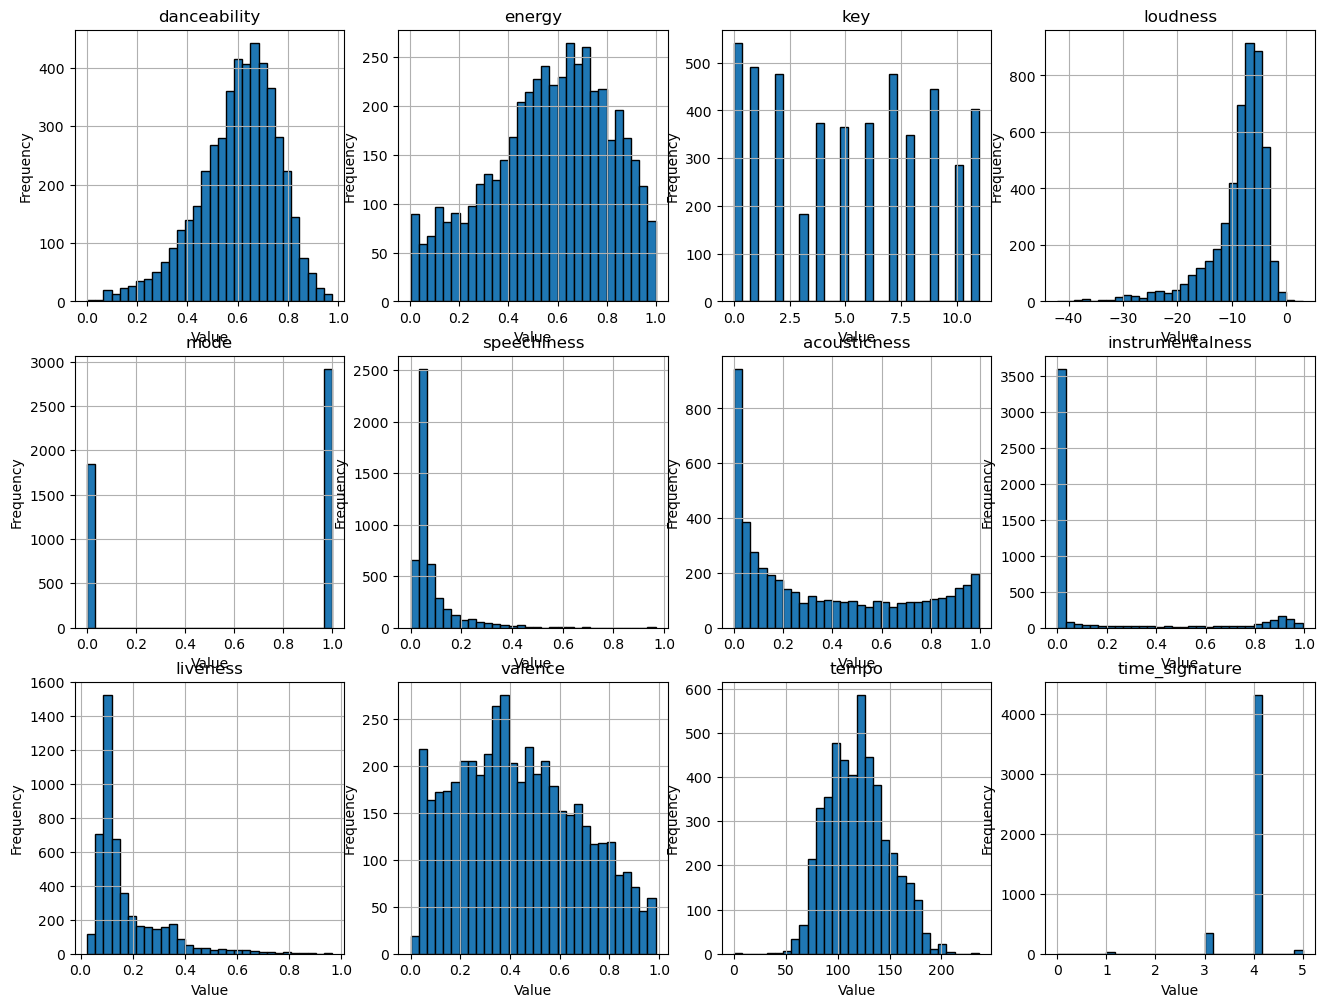

In [13]:
axes = plot_feature_distributions(df_features)

__2-D Handling Missing Values__  
Compute and display the count of missing values in each column. Handle the missing values by using the `SimpleImputer` class from `sklearn` library.

In [14]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5040 entries, 0 to 5039
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      4765 non-null   float64
 1   energy            4765 non-null   float64
 2   key               4765 non-null   float64
 3   loudness          4765 non-null   float64
 4   mode              4765 non-null   float64
 5   speechiness       4765 non-null   float64
 6   acousticness      4765 non-null   float64
 7   instrumentalness  4765 non-null   float64
 8   liveness          4765 non-null   float64
 9   valence           4765 non-null   float64
 10  tempo             4765 non-null   float64
 11  time_signature    4765 non-null   float64
dtypes: float64(12)
memory usage: 511.9 KB


In [15]:
# inspect the number of missing values in each column
missing_values = df_features.isna().sum()
missing_values

danceability        275
energy              275
key                 275
loudness            275
mode                275
speechiness         275
acousticness        275
instrumentalness    275
liveness            275
valence             275
tempo               275
time_signature      275
dtype: int64

Here's how we will handle the missing values for specific column:
- `danceability`, `energy`, `loudness`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence`, `tempo`:
  - These are continuous numerical features.
  - Use __mean__ to fill in missing values.
- `key`, `mode`, `time_signature`:
  - These are discrete numerical features.
  - Use __mode__ to fill in missing values.

__Note__: The final processed dataframe shall be reassigned to the existing `df_features` if you created a new variable during the process to hold the data.

In [16]:
from sklearn.impute import SimpleImputer
# use mean
mean_cols = ["danceability", "energy",  "loudness",  "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
imputer = SimpleImputer(strategy="mean")
df_features[mean_cols] = imputer.fit_transform(df_features[mean_cols])
# use mode
discrete_cols = ["key", "mode", "time_signature"] 
imputer = SimpleImputer(strategy="most_frequent")
df_features[discrete_cols] = imputer.fit_transform(df_features[discrete_cols])


__2-E Correlation Heatmap__  
Create a correlation matrix of the dataset and plot a heatmap to display the correlations between features in `df_features`.  
Assign the heatmap plotting to the variable `corr_heatmap`.

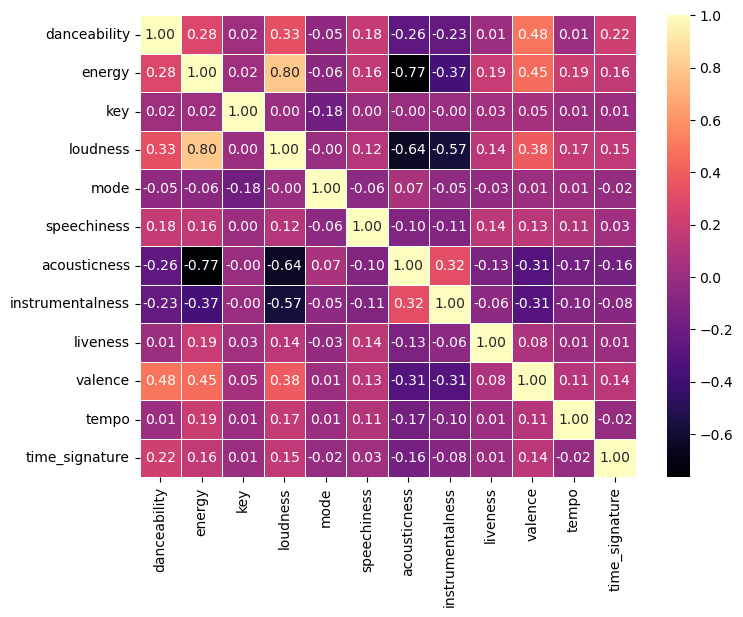

In [17]:
# visualize the correlation matrix
data_corr = df_features.corr()
plt.figure(figsize=(8,6))
corr_heatmap = sns.heatmap(data_corr, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.show()

__2-F Scaling Features__  
Scale the features using `StandardScaler` class in `sklearn`.

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_features_clean = scaler.fit_transform(df_features)

In [19]:
grader.check("q2")

q2 results: All test cases passed!

## 3. PCA & Variance Analysis [__15 marks__]

After done with the scaling, we are ready to perform dimensionality reduction with PCA.

__3-A Apply PCA__:  
Create a PCA object `pca` with the default parameters and apply it to the cleaned features.  
Subsequently, save the PCA-transformed data to a new DataFrame `df_pca` with column names as PC1, PC2, and so on.

In [20]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pca.fit_transform(df_features_clean)
df_pca = pd.DataFrame(df_pca, columns=[f"PC{i+1}" for i in range(df_pca.shape[1])])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,1.974203,-0.681226,-1.734604,0.909574,0.451966,1.221117,-0.477923,-0.364498,-0.380204,-0.972682,-0.255110,-0.152801
1,-4.070961,-0.345032,0.432137,0.154339,0.112187,0.690541,1.033697,0.239566,1.080889,0.174290,0.497574,-0.272294
2,2.175576,-0.362475,-0.841986,0.610860,-0.955335,0.763547,-0.852881,0.625957,-0.912003,0.235051,-0.072324,-0.015363
3,0.345339,0.605331,1.185361,0.053022,0.495078,-0.423182,0.599724,1.045296,0.031089,-1.238522,0.022120,0.046509
4,0.807311,-1.569801,-0.088202,-1.544978,0.906948,-0.028874,-0.059295,-0.124679,0.221433,-0.164120,-0.978698,0.592966
...,...,...,...,...,...,...,...,...,...,...,...,...
5035,-3.067108,1.440131,-0.482576,0.734131,1.289125,-1.546222,-0.546165,0.257628,-1.017373,0.480420,-0.249232,0.319114
5036,-0.017617,1.286551,0.374160,0.500805,-0.355758,0.452274,-0.183456,0.151777,-0.093322,-0.041696,-0.007998,0.016157
5037,-1.734433,0.247257,-0.916859,-0.130123,-2.984350,-1.091827,1.032149,-0.842448,-0.479935,-0.520011,-0.283622,-1.394559
5038,-1.684986,-1.748443,-0.100503,0.211892,0.423106,-0.214292,0.399803,-0.681735,-1.625178,0.614572,0.221524,0.393331


In [21]:
pca.explained_variance_ratio_

array([0.28551073, 0.1010864 , 0.09829919, 0.08805026, 0.08236032,
       0.07565611, 0.07079086, 0.06426967, 0.05693429, 0.04090045,
       0.02511807, 0.01102364])

__3-B Plotting Explained Variance__  
Plot the explained variance ratio and the cumulative explained variance.

Complete the function `plot_explained_variance_ratio` to create a line plot showcasing the explained variance ratio vs principal components.

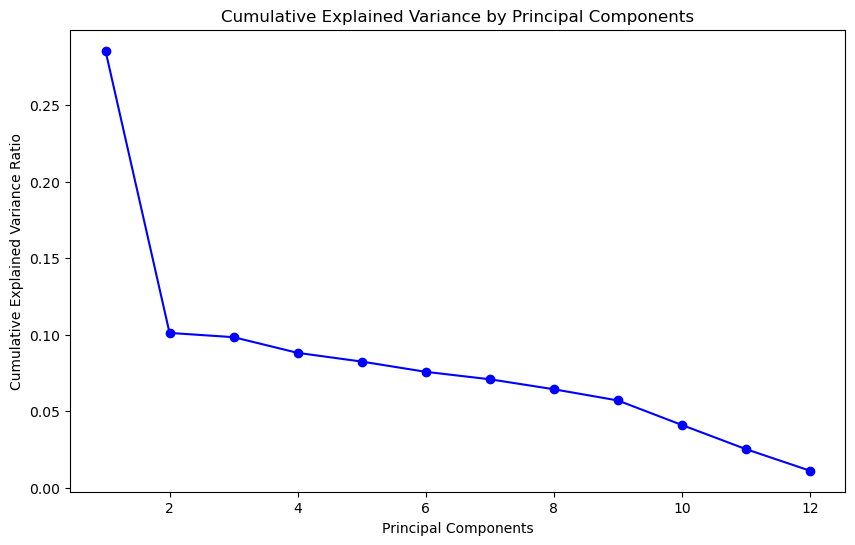

In [22]:
def plot_explained_variance_ratio(pca_model):
    '''
    Parameters:
    -----------
    pca_model : sklearn.decomposition.PCA
        A fitted PCA model with the attribute 'explained_variance_ratio_', which is an array-like 
        of shape (n_components,) containing the variance explained by each principal component.
    
    Returns:
    --------
    matplotlib.axes.Axes
        The Axes object that contains the explained variance ratio plot.
    '''
    _, ax = plt.subplots(figsize=(10, 6))
    
    # get explained variance ratio
    expl_var = pca_model.explained_variance_ratio_

    # plot cumulative explained var as ln plot
    ax.plot(range(1, len(expl_var) + 1), expl_var, marker='o', linestyle='-', color='blue', label='Cumulative Explained Variance')
    ax.set_xlabel("Principal Components")
    ax.set_ylabel("Cumulative Explained Variance Ratio")
    ax.set_title("Cumulative Explained Variance by Principal Components")
    return ax

ax1 = plot_explained_variance_ratio(pca)

Next, create a function that plots the cumulative explained variance ratio of the principal components by completing the function below:

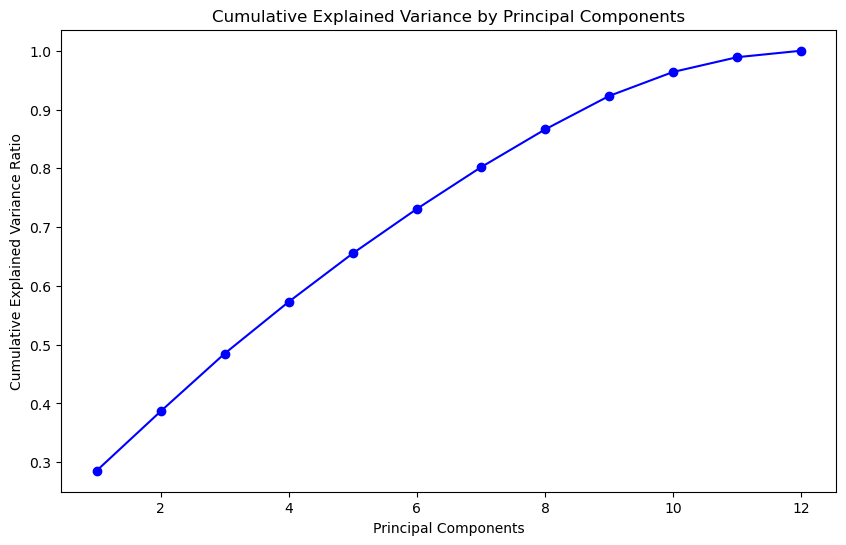

In [23]:
# Plot the cumulative explained variance ratio for a fitted PCA model.
def plot_cumulative_explained_variance(pca_model):
    """
    Parameters:
    -----------
    pca_model : sklearn.decomposition.PCA
        A fitted PCA model with the attribute 'explained_variance_ratio_', which is an array-like
        containing the variance explained by each principal component.

    Returns:
    --------
    matplotlib.axes.Axes
        The Axes object containing the cumulative explained variance ratio plot.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    expl_var = pca_model.explained_variance_ratio_
    cumu_var = np.cumsum(expl_var)

    # plot cumulative explained var as ln plot
    ax.plot(range(1, len(cumu_var) + 1), cumu_var, marker='o', linestyle='-', color='blue', label='Cumulative Explained Variance')
    ax.set_xlabel("Principal Components")
    ax.set_ylabel("Cumulative Explained Variance Ratio")
    ax.set_title("Cumulative Explained Variance by Principal Components")

    return ax

ax2 = plot_cumulative_explained_variance(pca)

__WHAT DO YOU THINK?__:  
In your own words, briefly explain how does the graph above help us in determining the appropriate number of components to select so that it results in a simpler model and less computational expense?

The graph allows us to determine the optimal number of principal components by visually showing how much variance is retained as more components are added. By minimizing the number of components used, it reduces the ammount of computation required.

In [24]:
grader.check("q3")

q3 results: All test cases passed!

## 4. K-Means Clustering [__30 marks__]

Perform K-Means with the PCA-transformed data.

__4-A PCA with 2 Components__  
For experimental purpose only, we will try with a 2 components PCA dataset. Create a new PCA object that compose of the top 2 components. Name the column "PC1" and "PC2".

In [25]:
pca_n2 = PCA(n_components=2)
df_pca_n2 = pca_n2.fit_transform(df_features_clean)
df_pca_n2 = pd.DataFrame(df_pca_n2, columns=[f"PC{i+1}" for i in range(df_pca_n2.shape[1])])
df_pca_n2

,PC1,PC2
0,1.974203,-0.681226
1,-4.070961,-0.345032
2,2.175576,-0.362475
3,0.345339,0.605331
4,0.807311,-1.569801
...,...,...
5035,-3.067108,1.440131
5036,-0.017617,1.286551
5037,-1.734433,0.247257
5038,-1.684986,-1.748443


__4-B Determine Optimal K__  
Find the optimum number of clusters for the K-Means model using the new PCA dataset. Plot the graph showing inertia vs clusters.

Note: Set `random_state=42` for the model. And use default params for the rest.

  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


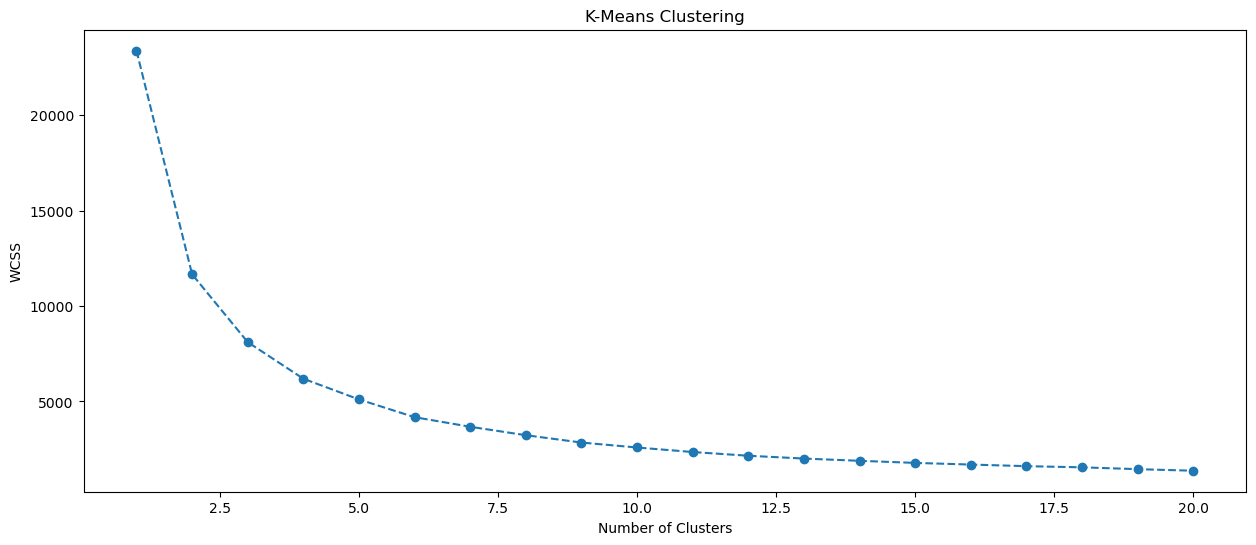

In [26]:
# determine optimum K value for KMeans with 2 components
from sklearn.cluster import KMeans
# disable warnings
import warnings
warnings.filterwarnings("ignore")
# create a list to store the inertia values
inertia_values = []

# loop through K values from 1 to 20 inclusive
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca_n2)
    inertia_values.append(kmeans.inertia_)

# plot the inertia values
# Plot the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters
plt.figure(figsize=(15, 6))
plt.plot(range(1, 21), inertia_values, marker="o", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-Means Clustering")
plt.show()

Note: If the optimal K is hard to determine from the graph above, you can use yellowbrick library to help. But that code portion for yellowbrick shouldn't be included in this assignment. Delete after finding the optimal K.

What is optimal K value?

In [27]:
optimal_k = 4

__4-C Train with Optimal K & Plotting the Clusters__  
Given a PCA-transformed DataFrame `df_pca_n2` (with columns 'PC1' and 'PC2') and an integer `optimal_k` representing the optimal number of clusters, complete the following tasks:

__Clustering__:  
Fit a KMeans model with `optimal_k` clusters (using random_state=42) on `df_pca_n2` and default params for the rest.
Add a new column "cluster" to `df_pca_n2` with the predicted cluster labels.

__Visualization__:  
Create a scatter plot of 'PC1' vs. 'PC2', coloring points by their cluster assignment.
Overlay the cluster centroids (in red) on the same plot.
Label the axes appropriately and add a title.

Hint: Use `final_kmeans.cluster_centers_` to obtain the centroids.

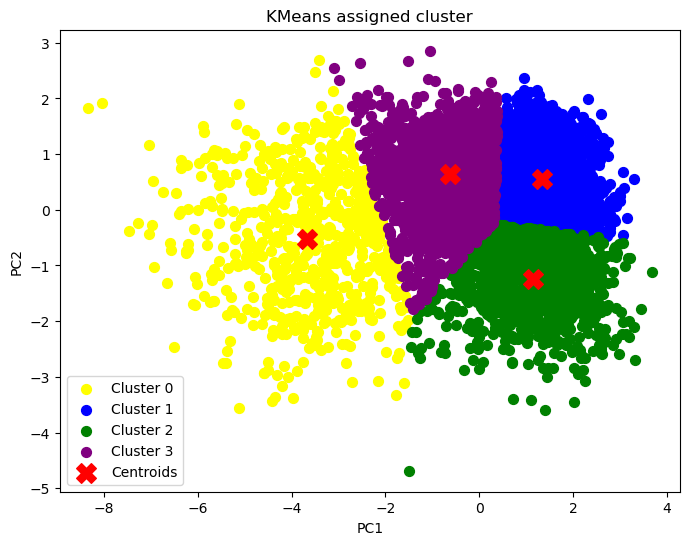

In [28]:
# make a copy of the PCA transformed data, use this copy for the rest of the task
df_pca_n2_copy = df_pca_n2.copy()
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_kmeans.fit(df_pca_n2_copy)
pred_y = final_kmeans.predict(df_pca_n2_copy)
df_pca_n2_copy["cluster"] = pred_y

plt.figure(figsize=(8, 6))
plt.scatter(df_pca_n2_copy.iloc[pred_y == 0, 0], df_pca_n2_copy.iloc[pred_y == 0, 1], s=50, c="yellow", label="Cluster 0")
plt.scatter(df_pca_n2_copy.iloc[pred_y == 1, 0], df_pca_n2_copy.iloc[pred_y == 1, 1], s=50, c="blue", label="Cluster 1")
plt.scatter(df_pca_n2_copy.iloc[pred_y == 2, 0], df_pca_n2_copy.iloc[pred_y == 2, 1], s=50, c="green", label="Cluster 2")
plt.scatter(df_pca_n2_copy.iloc[pred_y == 3, 0], df_pca_n2_copy.iloc[pred_y == 3, 1], s=50, c="purple", label="Cluster 3")

plt.scatter(
    final_kmeans.cluster_centers_[:, 0],
    final_kmeans.cluster_centers_[:, 1],
    s=200,
    marker="X",
    c="red",
    label="Centroids",
)

plt.title("KMeans assigned cluster")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

In [29]:
grader.check("q4")

q4 results: All test cases passed!

## 5. Performance Evaluation [__5 marks__]
Lastly, we will evaluate the performance of our cluster by using a technique called silhouette score.

The silhouette score is a metric used to evaluate the quality of clustering in unsupervised machine learning. It measures how well-separated and cohesive the clusters are by comparing the similarity of data points within a cluster to their similarity with points in other clusters.

The score ranges from -1 to 1:  
* _+1_: The point is well-clustered (far from other clusters, close to its own).  
*  _0_ : The point is on or near the boundary between clusters.  
* _-1_: The point may have been assigned to the wrong cluster (closer to another cluster than its own).  

Purpose:  
* Cluster Validation: It helps assess how appropriate the clustering is without needing labeled data.
* Choosing the Number of Clusters: By computing the average silhouette score across all points for different numbers of clusters (e.g., in k-means), you can identify the optimal number of clusters where cohesion and separation are maximized.
* Interpretation: It provides a quantitative way to compare different clustering algorithms or parameter settings.

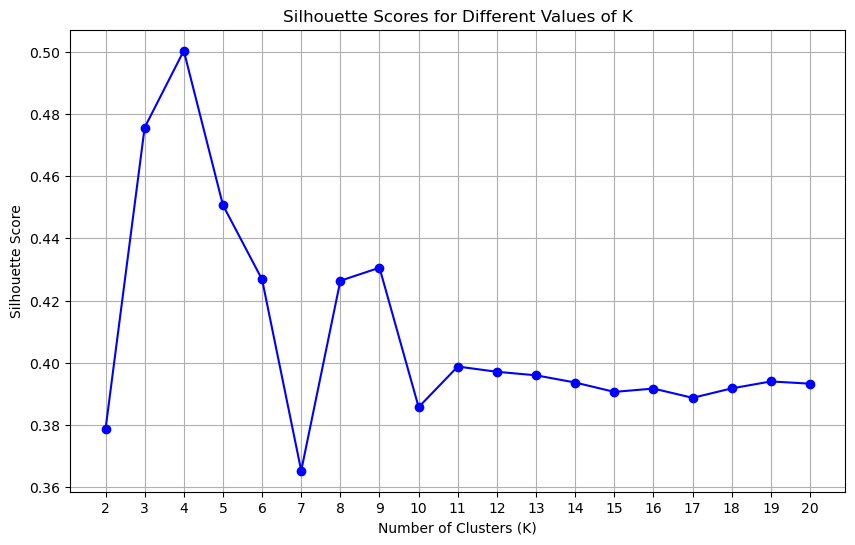

In [30]:
# use silhouette score to evaluate the model
from sklearn.metrics import silhouette_score

silhouette = []

# loop through K values from 2 to 20 inclusive
for i in range(2,21):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca_n2_copy)
    silhouette.append(silhouette_score(df_pca_n2_copy, kmeans.labels_))


# plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), silhouette, marker='o', linestyle='-', color='b')
plt.title('Silhouette Scores for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 21))
plt.grid(True)
plt.show()


In [31]:
grader.check("q5")

q5 results: All test cases passed!

__QUESTION__:  
Now given the silhouette score, explain what is your observation on the results. And comparing this with the optimal number of clusters obtain using the inertia with this silhouette score, are they different? Explain in your own words.

The silhouette scores all lie in the range of [~0.36, ~0.50], as all the values are positive, this means that it is unlikely that any of the values will be assigned into the wrong cluster using any of these k-values. (as the closer the score gets to 1, the better the seperation between clusters)

The highest score is ~0.5, where k = 4, which aligns with the optimal k-value found using intertia. This suggests that it is unlikely for the model to over/underfit. 

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [32]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=False)